In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/workdir/Datasets/PetImages/"
CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

In [4]:
print(img_array.shape)

(500, 365)


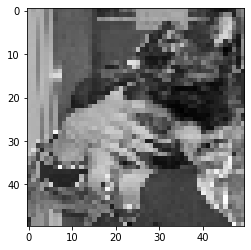

In [10]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except: 
                pass

create_training_data()

In [13]:
print(len(training_data))

24946


In [14]:
import random

random.shuffle(training_data)

In [16]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
1
0
1
1
1


In [23]:
X = []
y = []

In [24]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [25]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [20]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [21]:
X[1]

array([[[ 80],
        [117],
        [138],
        ...,
        [ 65],
        [ 68],
        [ 78]],

       [[173],
        [181],
        [175],
        ...,
        [ 66],
        [ 83],
        [100]],

       [[151],
        [112],
        [108],
        ...,
        [ 75],
        [105],
        [120]],

       ...,

       [[104],
        [123],
        [136],
        ...,
        [ 50],
        [ 48],
        [ 52]],

       [[ 82],
        [ 97],
        [136],
        ...,
        [ 48],
        [ 51],
        [ 47]],

       [[ 82],
        [ 86],
        [114],
        ...,
        [ 47],
        [ 51],
        [ 53]]], dtype=uint8)